<a href="https://colab.research.google.com/github/Venkat3103/Pfizer-Vaccine-Sentiment-Analysis/blob/main/CB_EN_U4CSE18212_266_MLDM_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study on Pfizer Vaccine Sentiment Analysis 
##Ashwin V - CB.EN.U4CSE18212
##Venkatasubramanian N - CB.EN.U4CSE18266

In [ ]:
!pip install gensim wordcloud transformers torch

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 50.3 MB/s 
     |████████████████████████████████| 3.3 MB 19.3 MB/s 
     |████████████████████████████████| 596 kB 56.3 MB/s 
     |████████████████████████████████| 59 kB 6.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
from os import path
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

% matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Machine-Learning-and-Data-Mining/Sentiment-Analysis-on-Vaccine-Tweets/main/vaccination_tweets.csv')

In [ ]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,1419621019082444806,The Peninsula Qatar,Qatar,News you can trust. Local Focus Global Vision....,2009-07-25 08:41:05,56730,229,780,True,2021-07-26 11:30:00,The study involved 499 medical workers - 100 r...,['PfizerBioNTech'],TweetDeck,0,4,False
9493,1419619885106225156,Elias Choueifaty,Lebanon,✈️: 🇯🇴 🇦🇪 🇬🇷 🇭🇺 🇦🇪 🇳🇱 🇧🇪 🇩🇪\n\n#Mamba_Out 🐍\n#...,2011-03-10 16:38:07,958,847,41473,False,2021-07-26 11:25:30,Fully vaccinated 💉✌🏻\n\n#PfizerBiontech,['PfizerBiontech'],Twitter for Android,0,99,False
9494,1419609638383849483,ryan savage,dublin (ireland),law grad,2010-06-07 15:56:45,279,2912,2379,False,2021-07-26 10:44:47,Off to get the vaccine today sure what else wo...,"['shtickitinme', 'PfizerBiontech']",Twitter for iPhone,0,3,False
9495,1419595835231330306,Dr. M.A.F.,Germany,🎨 Artist & ⚗ Scientist 🤓\nAn artist making her...,2018-04-23 13:05:20,169,1281,30655,False,2021-07-26 09:49:56,The wait is over. \nI just got my 2nd dose of ...,"['vaccinated', 'PfizerBiontech', 'GetVaccinate...",Twitter for Android,0,0,False


## Exploratory Data Analysis

In [ ]:
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.describe(include = 'all')

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
count,9.497000e+03,9497,7590,8900,9497,9.497000e+03,9497.000000,9.497000e+03,9497,9497,9497,7262,9496,9497.000000,9497.000000,9497
unique,NaN,6301,2761,6012,6268,NaN,NaN,NaN,2,9486,9490,4028,57,NaN,NaN,1
top,NaN,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07-09 09:04:01,NaN,NaN,NaN,False,2021-01-15 17:00:27,#Covid19 Vaccine Rollout Needs Spark Even More...,['PfizerBioNTech'],Twitter for iPhone,NaN,NaN,False
freq,NaN,90,150,90,90,NaN,NaN,NaN,8645,2,5,997,3246,NaN,NaN,9497
mean,1.362699e+18,NaN,NaN,NaN,NaN,3.634548e+04,1179.368643,1.481275e+04,NaN,NaN,NaN,NaN,NaN,1.422344,8.199221,NaN
std,2.212407e+16,NaN,NaN,NaN,NaN,3.107367e+05,2851.656336,4.650049e+04,NaN,NaN,NaN,NaN,NaN,12.100486,54.982753,NaN
min,1.337728e+18,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1.346532e+18,NaN,NaN,NaN,NaN,1.100000e+02,165.000000,4.070000e+02,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,1.354714e+18,NaN,NaN,NaN,NaN,4.690000e+02,462.000000,2.293000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
75%,1.373480e+18,NaN,NaN,NaN,NaN,2.099000e+03,1230.000000,1.120100e+04,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9497 non-null   int64 
 1   user_name         9497 non-null   object
 2   user_location     7590 non-null   object
 3   user_description  8900 non-null   object
 4   user_created      9497 non-null   object
 5   user_followers    9497 non-null   int64 
 6   user_friends      9497 non-null   int64 
 7   user_favourites   9497 non-null   int64 
 8   user_verified     9497 non-null   bool  
 9   date              9497 non-null   object
 10  text              9497 non-null   object
 11  hashtags          7262 non-null   object
 12  source            9496 non-null   object
 13  retweets          9497 non-null   int64 
 14  favorites         9497 non-null   int64 
 15  is_retweet        9497 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       1907
user_description     597
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2235
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.shape

(9497, 16)

## Data Wrangling

In [ ]:
df['hashtags'] = df['hashtags'].apply(lambda x:x.strip("][").replace("'","").split(', ') if isinstance(x, str) and x != 'NaN' else [])
df['hashtags']

0                                        [PfizerBioNTech]
1                                                      []
2       [coronavirus, SputnikV, AstraZeneca, PfizerBio...
3                                                      []
4              [whereareallthesickpeople, PfizerBioNTech]
                              ...                        
9492                                     [PfizerBioNTech]
9493                                     [PfizerBiontech]
9494                       [shtickitinme, PfizerBiontech]
9495    [vaccinated, PfizerBiontech, GetVaccinated, Va...
9496                              [ICYMI, COVID19Vaccine]
Name: hashtags, Length: 9497, dtype: object

## Data Visualization

### Top Hashtag Count

In [ ]:
hashtags = list(np.concatenate(df['hashtags'].tolist()).flat)
frequency = pd.Series(hashtags).value_counts()
frequency

PfizerBioNTech        3805
PfizerBiontech        1055
COVID19               1030
vaccine                790
CovidVaccine           574
                      ... 
haircut                  1
marrychristmas2020       1
DryIce                   1
MassVaccination          1
HeinzField               1
Length: 3082, dtype: int64

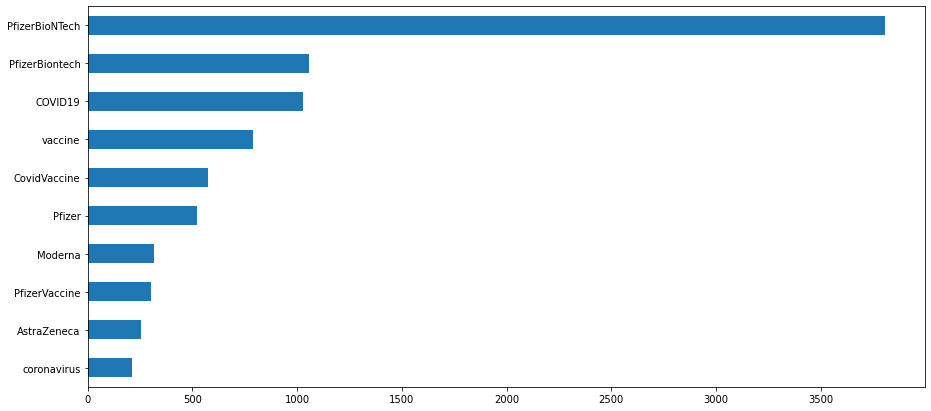

In [ ]:
frequency.nlargest(10).sort_values().plot(kind = 'barh',figsize=(15,7))

### Top @ mentions

In [ ]:
mention = []
for i in range(0, len(df)):
    review1 = df['text'][i]
    review1 = re.findall('@[a-zA-Z0-9_]+', review1)
    for j in review1:
        mention.append(j)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



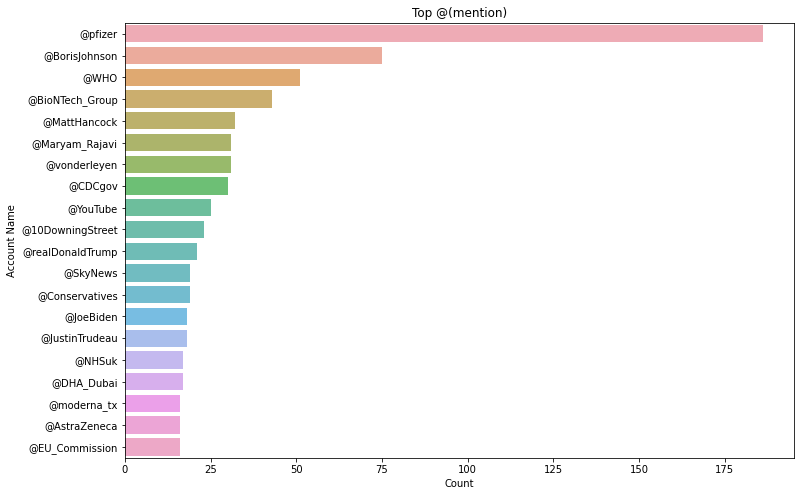

In [ ]:
df_temp = pd.DataFrame(mention)
df_temp = df_temp[0].value_counts()
df_temp = df_temp[:20,]
plt.figure(figsize = (12, 8))
sns.barplot(df_temp.values, df_temp.index, alpha = 0.8)
plt.title("Top @(mention)")
plt.ylabel("Account Name")
plt.xlabel("Count")
plt.show()

### Number of Tweets based on Time

In [ ]:
f_data = df
f_data['date'] = pd.to_datetime(f_data['date']).dt.date

f_data['year'] = pd.DatetimeIndex(f_data['date']).year
f_data['month'] = pd.DatetimeIndex(f_data['date']).month

f_data[:5]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,[PfizerBioNTech],Twitter for Android,0,0,False,2020,12
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,[],Twitter Web App,1,1,False,2020,12
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[coronavirus, SputnikV, AstraZeneca, PfizerBio...",Twitter for Android,0,0,False,2020,12
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",[],Twitter Web App,446,2129,False,2020,12
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"[whereareallthesickpeople, PfizerBioNTech]",Twitter for iPhone,0,0,False,2020,12


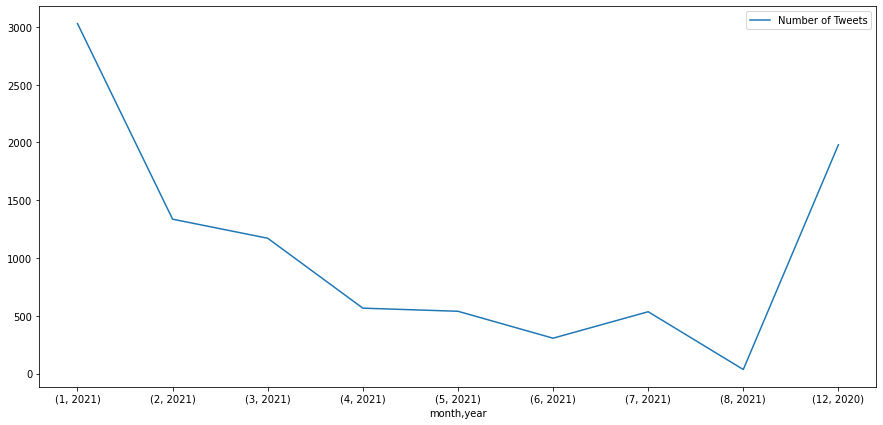

In [ ]:
symbols = f_data.groupby(['month','year']).count()
symbols = symbols[['id']]
symbols.rename(columns={'id': 'Number of Tweets'}, inplace = True)
symbols.plot(figsize=(15,7))

### Distribution of Followers

In [ ]:
followers = df["user_followers"].tolist()
print("Minimum Followers: ", min(followers))
print("Maximum Followers: ", max(followers))

Minimum Followers:  0
Maximum Followers:  13714928


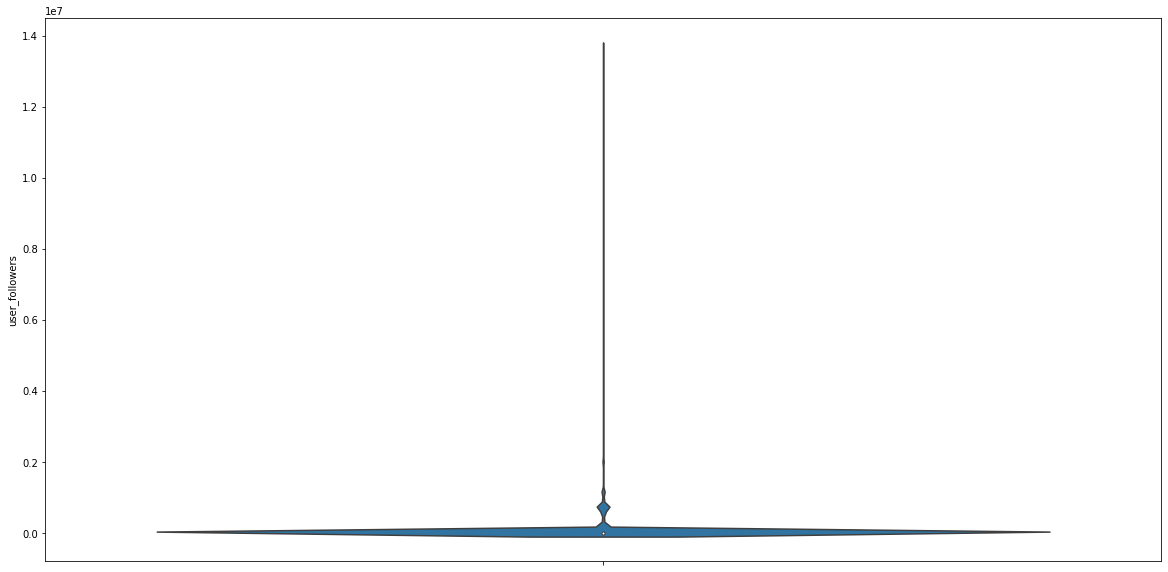

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(y = df["user_followers"])

In [ ]:
followersdist = df["user_followers"].describe()
followersdist

count    9.497000e+03
mean     3.634548e+04
std      3.107367e+05
min      0.000000e+00
25%      1.100000e+02
50%      4.690000e+02
75%      2.099000e+03
max      1.371493e+07
Name: user_followers, dtype: float64

In [ ]:
q1 = followersdist[4]
q3 = followersdist[6]
user_followers = df["user_followers"][(df["user_followers"]>=q1) & (df['user_followers']<=q3)] 
user_followers

0       405
1       834
4       152
8       887
9       671
       ... 
9490    145
9493    958
9494    279
9495    169
9496    297
Name: user_followers, Length: 4759, dtype: int64

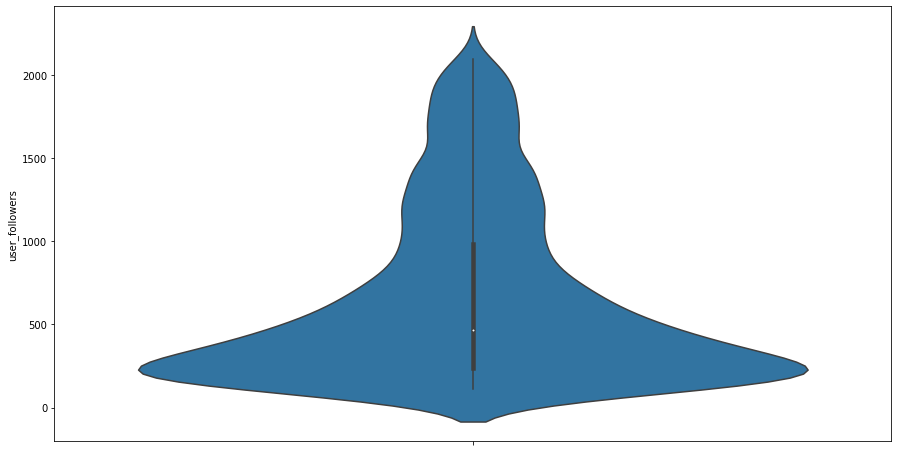

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(y = user_followers)

### User Created Dates

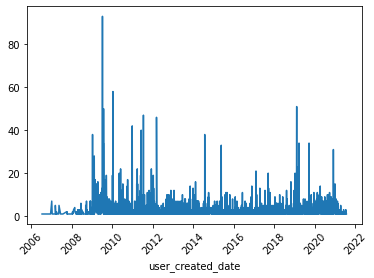

In [ ]:
df['user_created_datetime'] = pd.to_datetime(df.user_created)
df['user_created_date'] = df['user_created_datetime'].dt.date
df.groupby(['user_created_date']).count().text.plot.line(rot='45');

### Tweet Sources

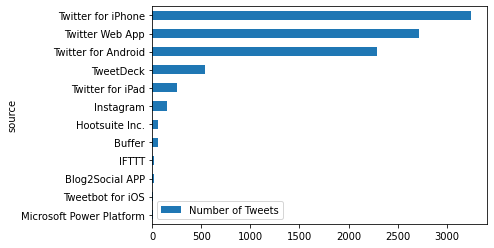

In [ ]:
by_source = df.groupby('source').count()
by_source = by_source[["id"]]
by_source.rename(columns = {"id":"Number of Tweets"},inplace=True)
by_source[by_source['Number of Tweets'] > 10].sort_values('Number of Tweets').plot.barh(y='Number of Tweets');

### Top 5 Countries

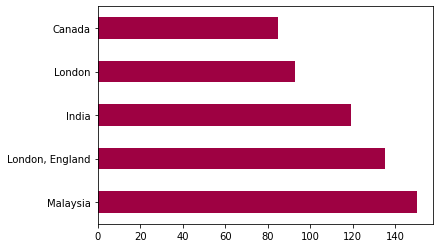

In [ ]:
cmap = plt.cm.get_cmap('Spectral') 

countries=df['user_location'].value_counts().sort_values(ascending=False)[:5].plot(
    kind = 'barh', 
    cmap=cmap, 
    edgecolor='None')

### Most Frequent Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

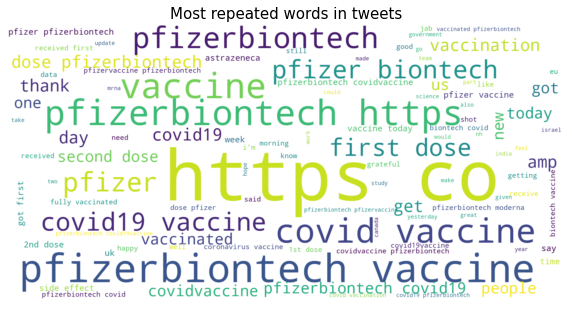

In [ ]:
# Get stopwords
# Define nltk stopwords in english
stop_words = stopwords.words('english')
stop_words.extend(['ha', 'wa', '-'])

# Get a string of tweets 
tweet_text = ",".join(review.lower() for review in df.text if 'covid' not in review)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(tweet_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in tweets',fontsize=15)
plt.show()

### Heatmap Correlation

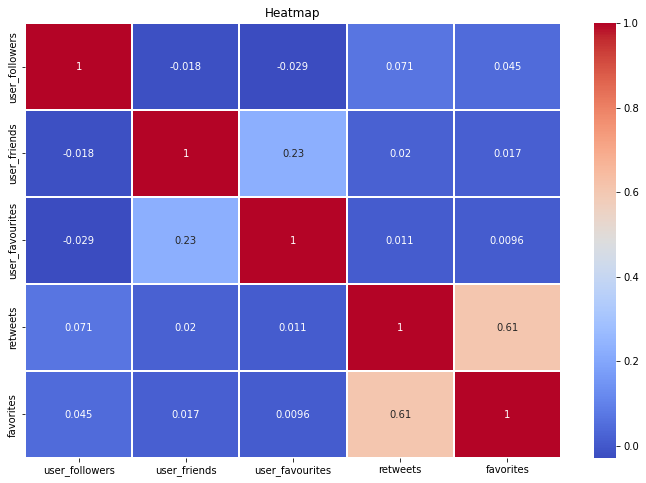

In [ ]:
plt.figure(figsize = (12, 8))
dataset_cor = df[['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']].corr()
axes = sns.heatmap(dataset_cor, linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True)
axes.set_title('Heatmap')
plt.show()

## Text Preprocessing

In [ ]:
f_data = df
f_data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,user_created_datetime,user_created_date
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,[PfizerBioNTech],Twitter for Android,0,0,False,2020,12,2009-04-08 17:52:46,2009-04-08
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,[],Twitter Web App,1,1,False,2020,12,2009-09-21 15:27:30,2009-09-21
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[coronavirus, SputnikV, AstraZeneca, PfizerBio...",Twitter for Android,0,0,False,2020,12,2020-06-25 23:30:28,2020-06-25


In [ ]:
#Remove twitter handlers
f_data.text = f_data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
f_data.text = f_data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
f_data.text = f_data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
f_data.text = f_data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
df["text"] = f_data.text
f_data.text[:5]

0    Same folks said daikon paste could treatcytoki...
1    While the world has been on the wrong side of ...
2         Russian vaccine is created to last 2 4 years
3    Facts are immutable Senator even when you re n...
4               Explain to me again why we needvaccine
Name: text, dtype: object

In [ ]:
df['text'].replace('', np.nan, inplace=True)

df.dropna(subset=['text'], inplace=True)

## Tokenizing Words

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [ ]:
data_words = list(sent_to_words(df['text'].tolist()))
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
df["tokenized_review"] = data
print(data[:5])

['same folks said daikon paste could treatcytokine storm', 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev', 'russian vaccine is created to last years', 'facts are immutable senator even when you re not ethically sturdy enough to acknowledge them you were born', 'explain to me again why we needvaccine']


## Labelling using Vader Algorithm 

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    if scores["neg"] > scores["pos"]:
        return 0
    return 1

df["vader_result"] = df["tokenized_review"].apply(lambda x: vader_sentiment_result(x))
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,user_created_datetime,user_created_date,tokenized_review,vader_result
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treatcytoki...,[PfizerBioNTech],Twitter for Android,0,0,False,2020,12,2009-04-08 17:52:46,2009-04-08,same folks said daikon paste could treatcytoki...,1
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,[],Twitter Web App,1,1,False,2020,12,2009-09-21 15:27:30,2009-09-21,while the world has been on the wrong side of ...,0
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,Russian vaccine is created to last 2 4 years,"[coronavirus, SputnikV, AstraZeneca, PfizerBio...",Twitter for Android,0,0,False,2020,12,2020-06-25 23:30:28,2020-06-25,russian vaccine is created to last years,1
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,Facts are immutable Senator even when you re n...,[],Twitter Web App,446,2129,False,2020,12,2008-09-10 11:28:53,2008-09-10,facts are immutable senator even when you re n...,1
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we needvaccine,"[whereareallthesickpeople, PfizerBioNTech]",Twitter for iPhone,0,0,False,2020,12,2020-04-23 17:58:42,2020-04-23,explain to me again why we needvaccine,1


## Labelling using Zero-Shot Classifier

In [ ]:
# from tqdm import tqdm
# from transformers import pipeline
# from sklearn.metrics import accuracy_score

# classifier = pipeline("zero-shot-classification")

# results = []
# the_labels = [1, 0]

# for idx, item in tqdm(df.iterrows()):
  
#   res = classifier(item['tokenized_review'], the_labels)

#   results.append( res['labels'][0] )
  
# df["zero_shot_result"] = results
# df.head()

## Loading the BERT Tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## Creating the Dataset Class

In [ ]:
class TheDataset(torch.utils.data.Dataset):

    def __init__(self, reviews, sentiments, tokenizer):
        self.reviews    = reviews
        self.sentiments = sentiments
        self.tokenizer  = tokenizer
        self.max_len    = tokenizer.model_max_length
  
    def __len__(self):
        return len(self.reviews)
  
    def __getitem__(self, index):
        review = str(self.reviews[index])
        sentiments = self.sentiments[index]

        encoded_review = self.tokenizer.encode_plus(
            review,
            add_special_tokens    = True,
            max_length            = self.max_len,
            return_token_type_ids = False,
            return_attention_mask = True,
            return_tensors        = 'pt',
            padding               = "max_length",
            truncation            = True
        )

        return {
            'input_ids': encoded_review['input_ids'][0],
            'attention_mask': encoded_review['attention_mask'][0],
            'labels': torch.tensor(sentiments, dtype=torch.long)
        }

## Splitting Train and Test Data for BERT Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, range(df.shape[0]), test_size=0.20, random_state=42)

# Prepare the Train/Validation sets
train_set_dataset = TheDataset(
    reviews    = X_train.text.tolist(),
    sentiments = X_train.vader_result.tolist(),
    tokenizer  = tokenizer,
)

valid_set_dataset = TheDataset(
    reviews    = X_test.text.tolist(),
    sentiments = X_test.vader_result.tolist(),
    tokenizer  = tokenizer,
)

## Creating BERT Trainer Parameters

In [ ]:
# Load the BERT model
model = BertForSequenceClassification.from_pretrained("bert-large-uncased")

# Freeze BERT except (the 24th layer + the last pooler layer)
for name, param in model.bert.named_parameters():
    if ( not name.startswith('pooler') ) and "layer.23" not in name :
        param.requires_grad = False

# The function to get the accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define the training parameters
training_args = TrainingArguments(
    output_dir                  = "./sentiment-analysis",
    num_train_epochs            = 10,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size  = 64,
    warmup_steps                = 500,
    weight_decay                = 0.01,
    save_strategy               = "epoch",
    evaluation_strategy         = "steps"
)

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

## Defining the Trainer Object

In [ ]:
trainer = Trainer(
    model           = model,
    args            = training_args,
    train_dataset   = train_set_dataset,
    eval_dataset    = valid_set_dataset,
    compute_metrics = compute_metrics
)

# Start pre-training!
trainer.train()

***** Running training *****
  Num examples = 7557
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4730


Step,Training Loss,Validation Loss


In [ ]:
trainer.evaluate()

In [ ]:
trainer.save_model('/content/vader_bert_model')

In [ ]:
!zip -r /content/vader_bert_model.zip /content/vader_bert_model

In [ ]:
files.download("/content/vader_bert_model.zip")